In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [2]:
# Set Parameters
n_samples = 1000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [3]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [4]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [5]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

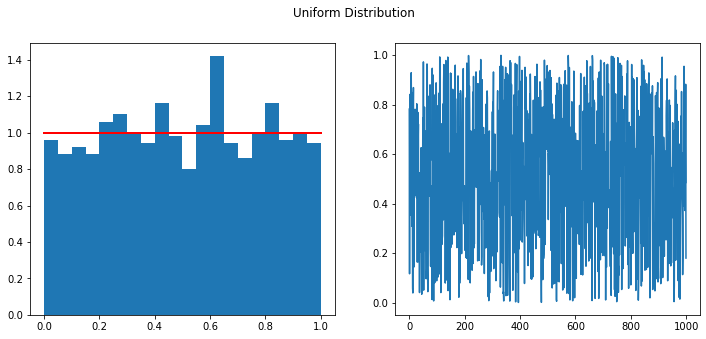

In [6]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

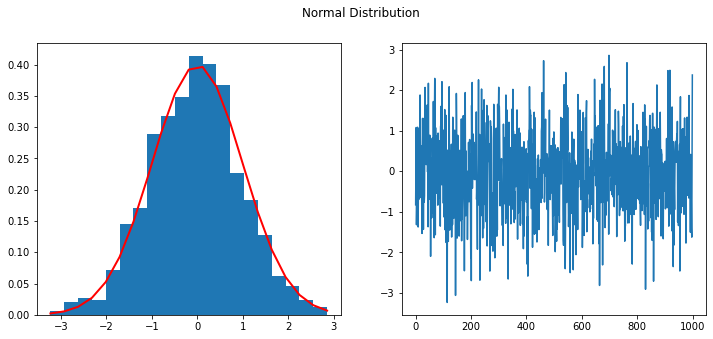

In [7]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

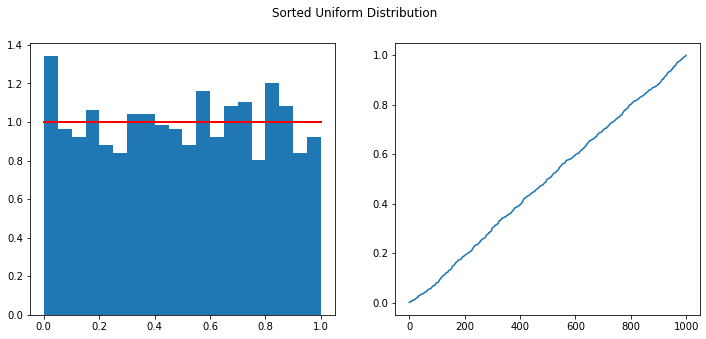

In [8]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

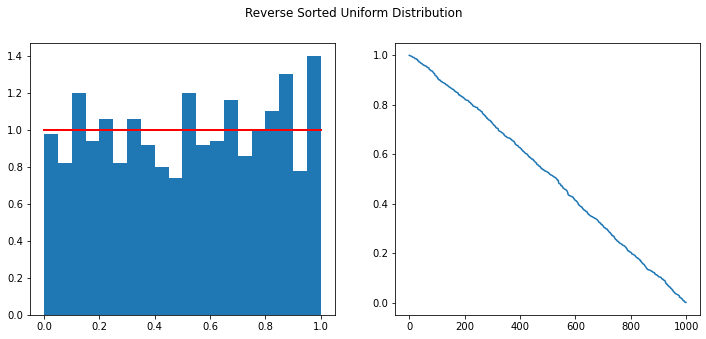

In [9]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

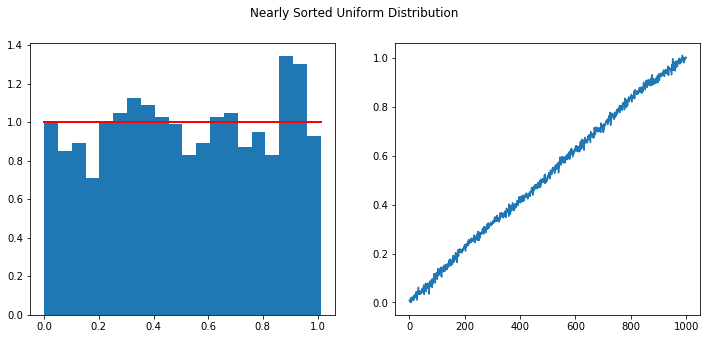

In [10]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

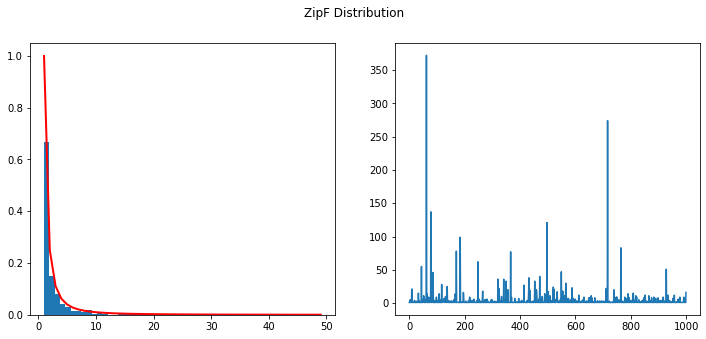

In [11]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [12]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [13]:
df_distribions = create_df_distributions()

In [14]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf,Strings,Dates,Repetetive_Numbers
0,0.418974,-0.442565,0.000758,0.999503,-0.003744,1,heq,2020-02-19 18:05:42.034660,69
1,0.306909,-0.763019,0.000809,0.998035,-0.001640,1,v8l,2019-08-06 18:05:42.034660,77
2,0.952908,1.245109,0.002693,0.997796,0.007057,1,r3b,2019-06-25 18:05:42.034660,9
3,0.307676,0.165268,0.002871,0.996752,0.011499,1,vhf,2020-02-13 18:05:42.034660,69
4,0.846717,-0.654098,0.003181,0.995774,0.003384,4,6lr,2019-01-26 18:05:42.034660,69


In [15]:
def evaluate_sorts(distribution="Uniform", second_col = None, repetitions=1000):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = datetime.now()
                #start_time = float("{:.20f}".format(time.time()))
                df_distribions.sort_values([distribution],kind=sorting_algorithm)
                #exeuction_time =(float("{:.20f}".format(time.time())) - float("{:.20f}".format(start_time)))*1000
                exeuction_time = (datetime.now() - start_time).microseconds/1000
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.round(np.mean(algorithm_times),4), "miliseconds")
            print("It has a STD of", np.round(np.std(algorithm_times),2))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = datetime.now()
                #start_time = float("{:.20f}".format(time.time()))
                df_distribions.sort_values([distribution, second_col],kind=sorting_algorithm)
                #exeuction_time =(float("{:.20f}".format(time.time())) - float("{:.20f}".format(start_time)))*1000
                exeuction_time = (datetime.now() - start_time).microseconds/1000
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.round(np.mean(algorithm_times),4), "miliseconds")
            print("It has a STD of", np.round(np.std(algorithm_times),2))
    return measures

In [16]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 1.3995 miliseconds
It has a STD of 0.49
The time of mergesort is 1.419 miliseconds
It has a STD of 0.5
The time of heapsort is 1.3396 miliseconds
It has a STD of 0.47


In [17]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 2.2056 miliseconds
It has a STD of 0.86
The time of mergesort is 2.1955 miliseconds
It has a STD of 0.72
The time of heapsort is 2.3277 miliseconds
It has a STD of 0.57


In [18]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 1.5629 miliseconds
It has a STD of 0.52
The time of mergesort is 1.699 miliseconds
It has a STD of 0.64
The time of heapsort is 1.5874 miliseconds
It has a STD of 0.54


In [19]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 1.4797 miliseconds
It has a STD of 0.5
The time of mergesort is 1.415 miliseconds
It has a STD of 0.49
The time of heapsort is 1.426 miliseconds
It has a STD of 0.49


In [20]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 0.6092 miliseconds
It has a STD of 0.49
The time of mergesort is 0.6575 miliseconds
It has a STD of 0.48
The time of heapsort is 0.8541 miliseconds
It has a STD of 0.43


In [21]:
print("Dates")
df_dates = evaluate_sorts(distribution="Dates")

Dates
The time of quicksort is 0.7356 miliseconds
It has a STD of 0.44
The time of mergesort is 0.7499 miliseconds
It has a STD of 0.44
The time of heapsort is 0.7541 miliseconds
It has a STD of 0.43


In [22]:
print("Strings")
df_strings = evaluate_sorts(distribution="Strings")

Strings
The time of quicksort is 1.0231 miliseconds
It has a STD of 0.24
The time of mergesort is 1.0299 miliseconds
It has a STD of 0.25
The time of heapsort is 1.1956 miliseconds
It has a STD of 0.4


In [23]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 0.7079 miliseconds
It has a STD of 0.46
The time of mergesort is 0.6731 miliseconds
It has a STD of 0.47
The time of heapsort is 0.6569 miliseconds
It has a STD of 0.47


In [24]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 0.6937 miliseconds
It has a STD of 0.46
The time of mergesort is 0.699 miliseconds
It has a STD of 0.46
The time of heapsort is 0.7755 miliseconds
It has a STD of 0.46


In [25]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.6542 miliseconds
It has a STD of 0.48
The time of mergesort is 0.6041 miliseconds
It has a STD of 0.49
The time of heapsort is 0.6567 miliseconds
It has a STD of 0.47


In [26]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.6482 miliseconds
It has a STD of 0.48
The time of mergesort is 0.6786 miliseconds
It has a STD of 0.47
The time of heapsort is 0.6677 miliseconds
It has a STD of 0.47


In [27]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.7105 miliseconds
It has a STD of 0.45
The time of mergesort is 0.6671 miliseconds
It has a STD of 0.47
The time of heapsort is 0.6794 miliseconds
It has a STD of 0.47


In [28]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 0.6342 miliseconds
It has a STD of 0.48
The time of mergesort is 0.6512 miliseconds
It has a STD of 0.48
The time of heapsort is 0.6199 miliseconds
It has a STD of 0.48


In [29]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle('Distribution')
    count, bins, ignored = ax1.hist(sort_dist, 10, density=True)
    #ax1.plot(bins, 1/(std_sort_algo * np.sqrt(2 * np.pi)) *
    #               np.exp( - (bins - mean_sort_algo)**2 / (2 * std_sort_algo**2) ),
    #         linewidth=2, color='r')
    ax2.plot(sort_dist)

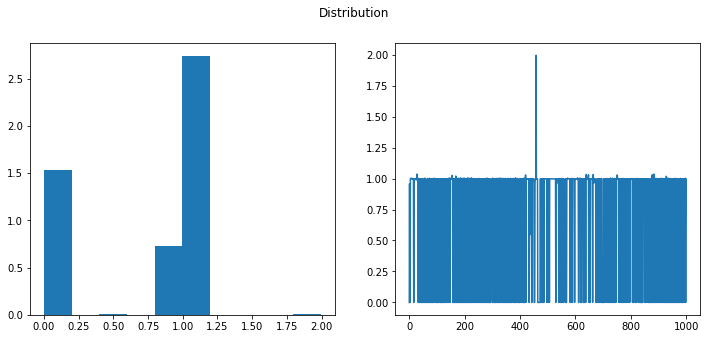

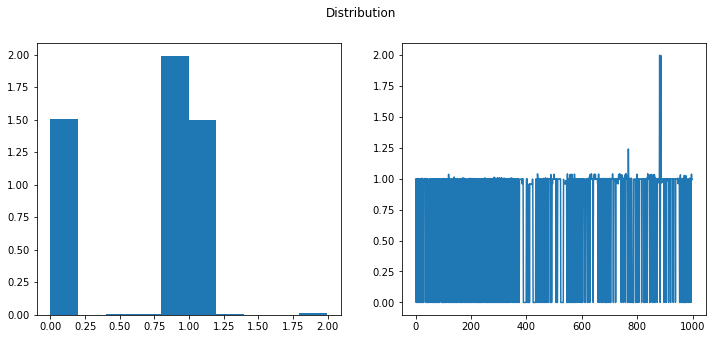

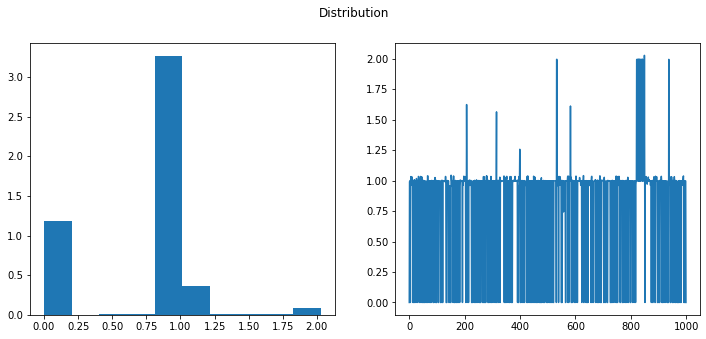

In [30]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean)

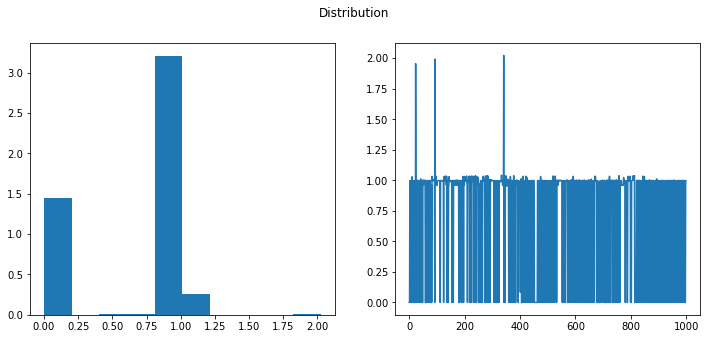

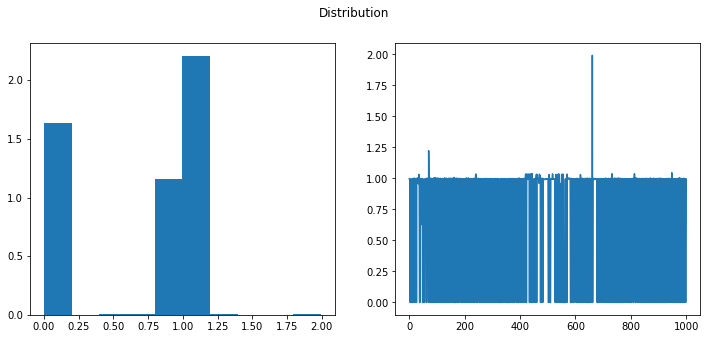

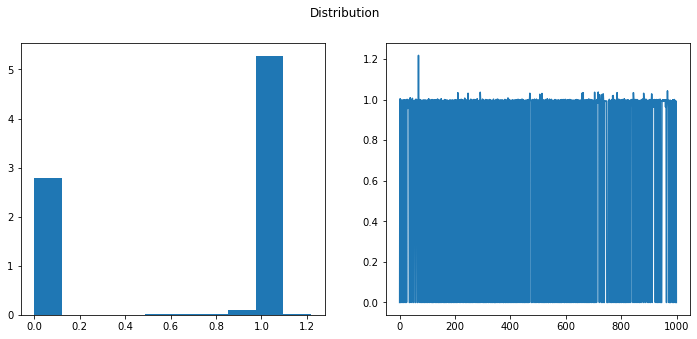

In [31]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean)

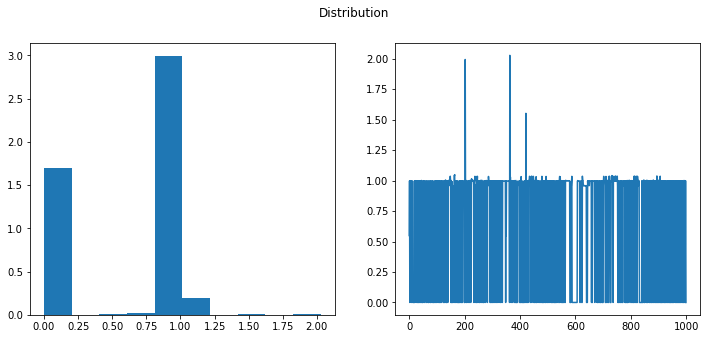

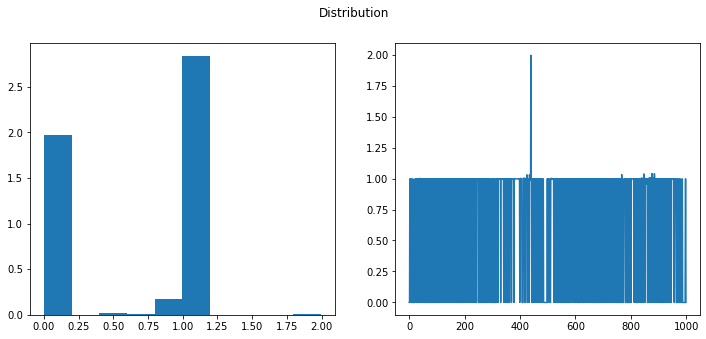

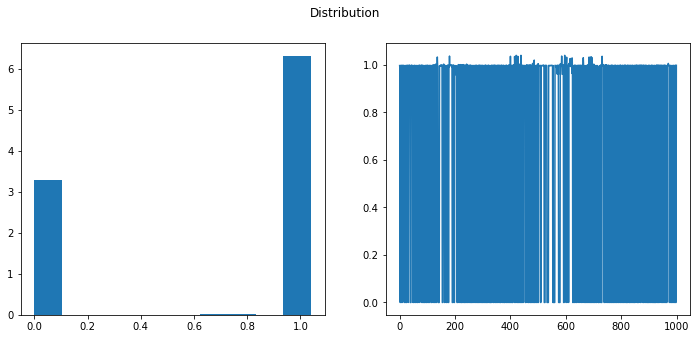

In [32]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean)

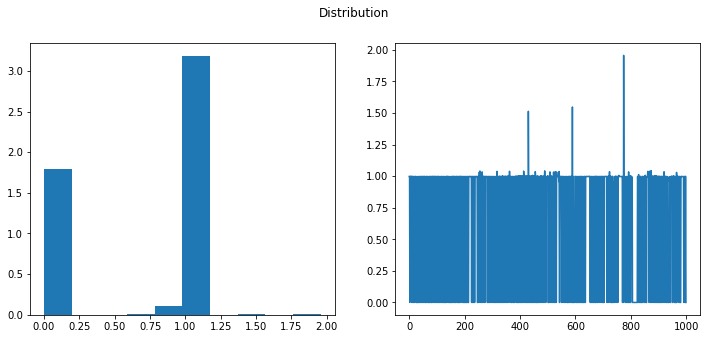

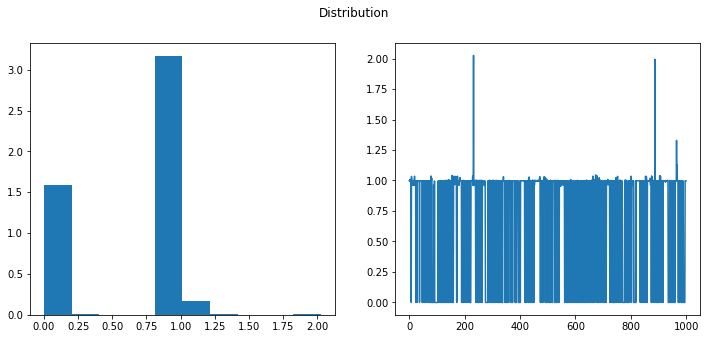

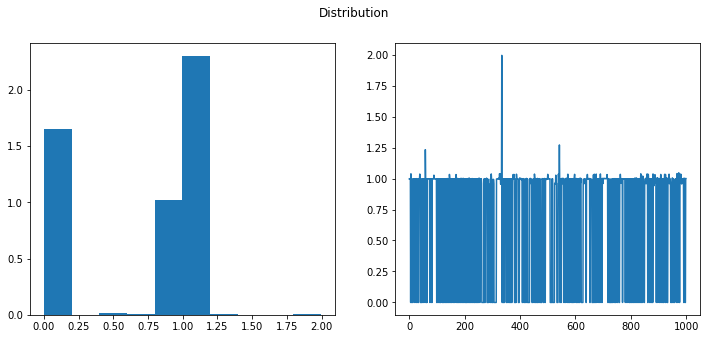

In [33]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean)

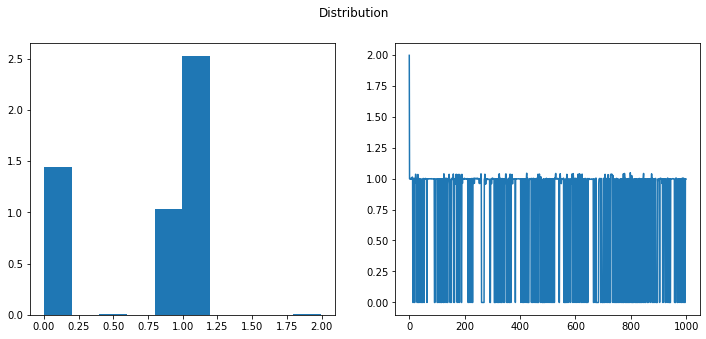

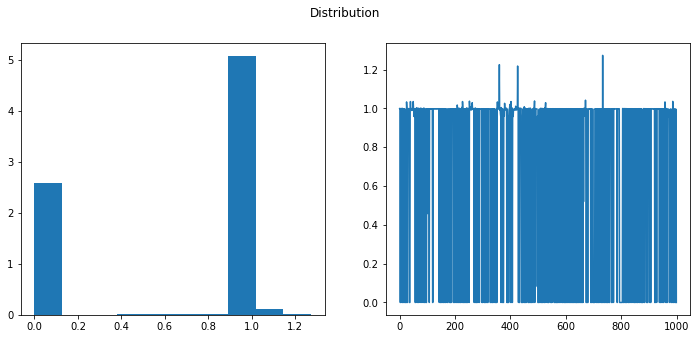

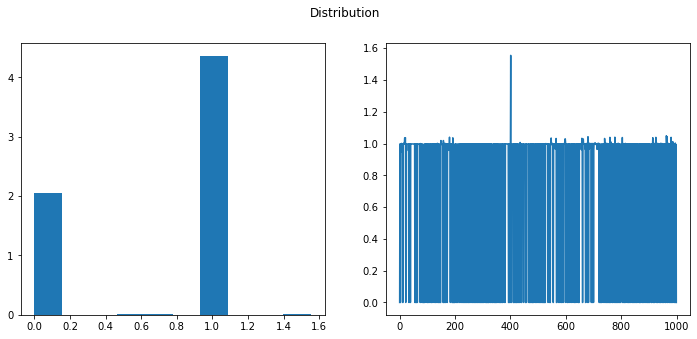

In [34]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean)

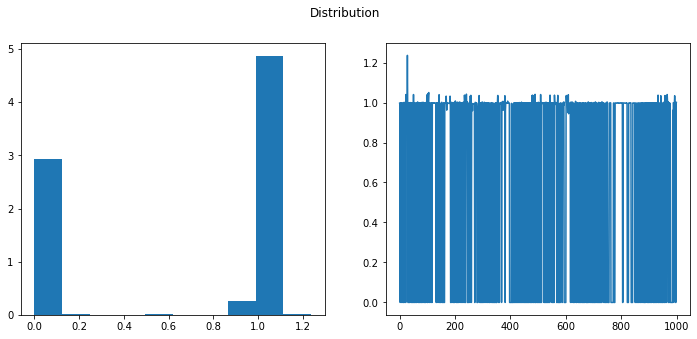

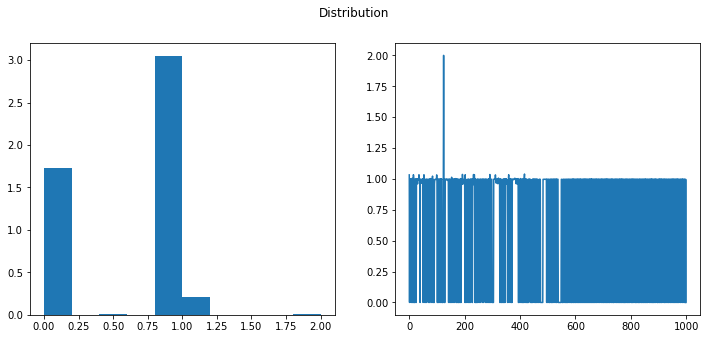

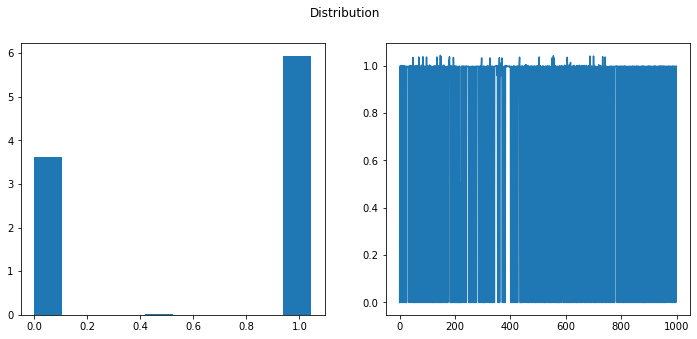

In [35]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean)